# KNN vs LOF Comparison on Custom Clusters

This notebook compares KNN and LOF anomaly detection models on custom generated clusters.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [2]:
# Generate 2 clusters with custom parameters
# Cluster 1: 200 samples, center (-10, -10), std 2
# Cluster 2: 100 samples, center (10, 10), std 6
X, y = make_blobs(
    n_samples=[200, 100],
    centers=[[-10, -10], [10, 10]],
    cluster_std=[2, 6],
    random_state=42
)

print(f"Generated {len(X)} samples")
print(f"Shape: {X.shape}")
print(f"Cluster distribution: {np.bincount(y)}")

Generated 300 samples
Shape: (300, 2)
Cluster distribution: [200 100]


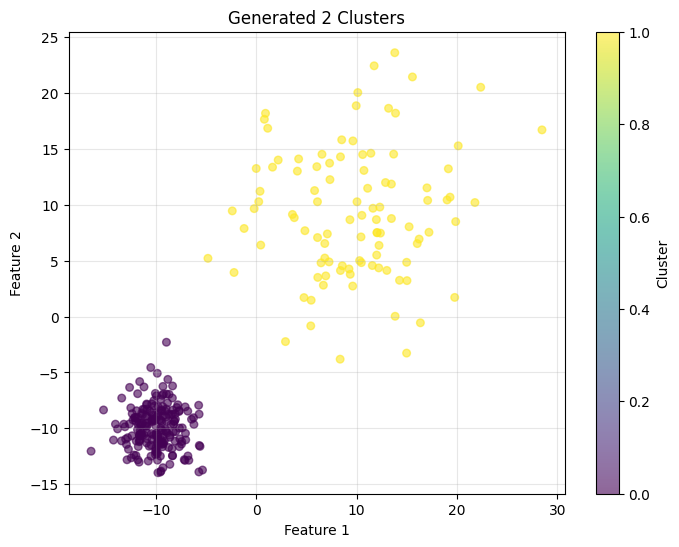

In [3]:
# Visualize the generated clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, alpha=0.6)
plt.title('Generated 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# define contamination rate and n_neighbors values to test
contamination = 0.07
n_neighbors_list = [3, 5, 10, 20]

print(f"Contamination rate: {contamination}")
print(f"Testing n_neighbors: {n_neighbors_list}")

Contamination rate: 0.07
Testing n_neighbors: [3, 5, 10, 20]


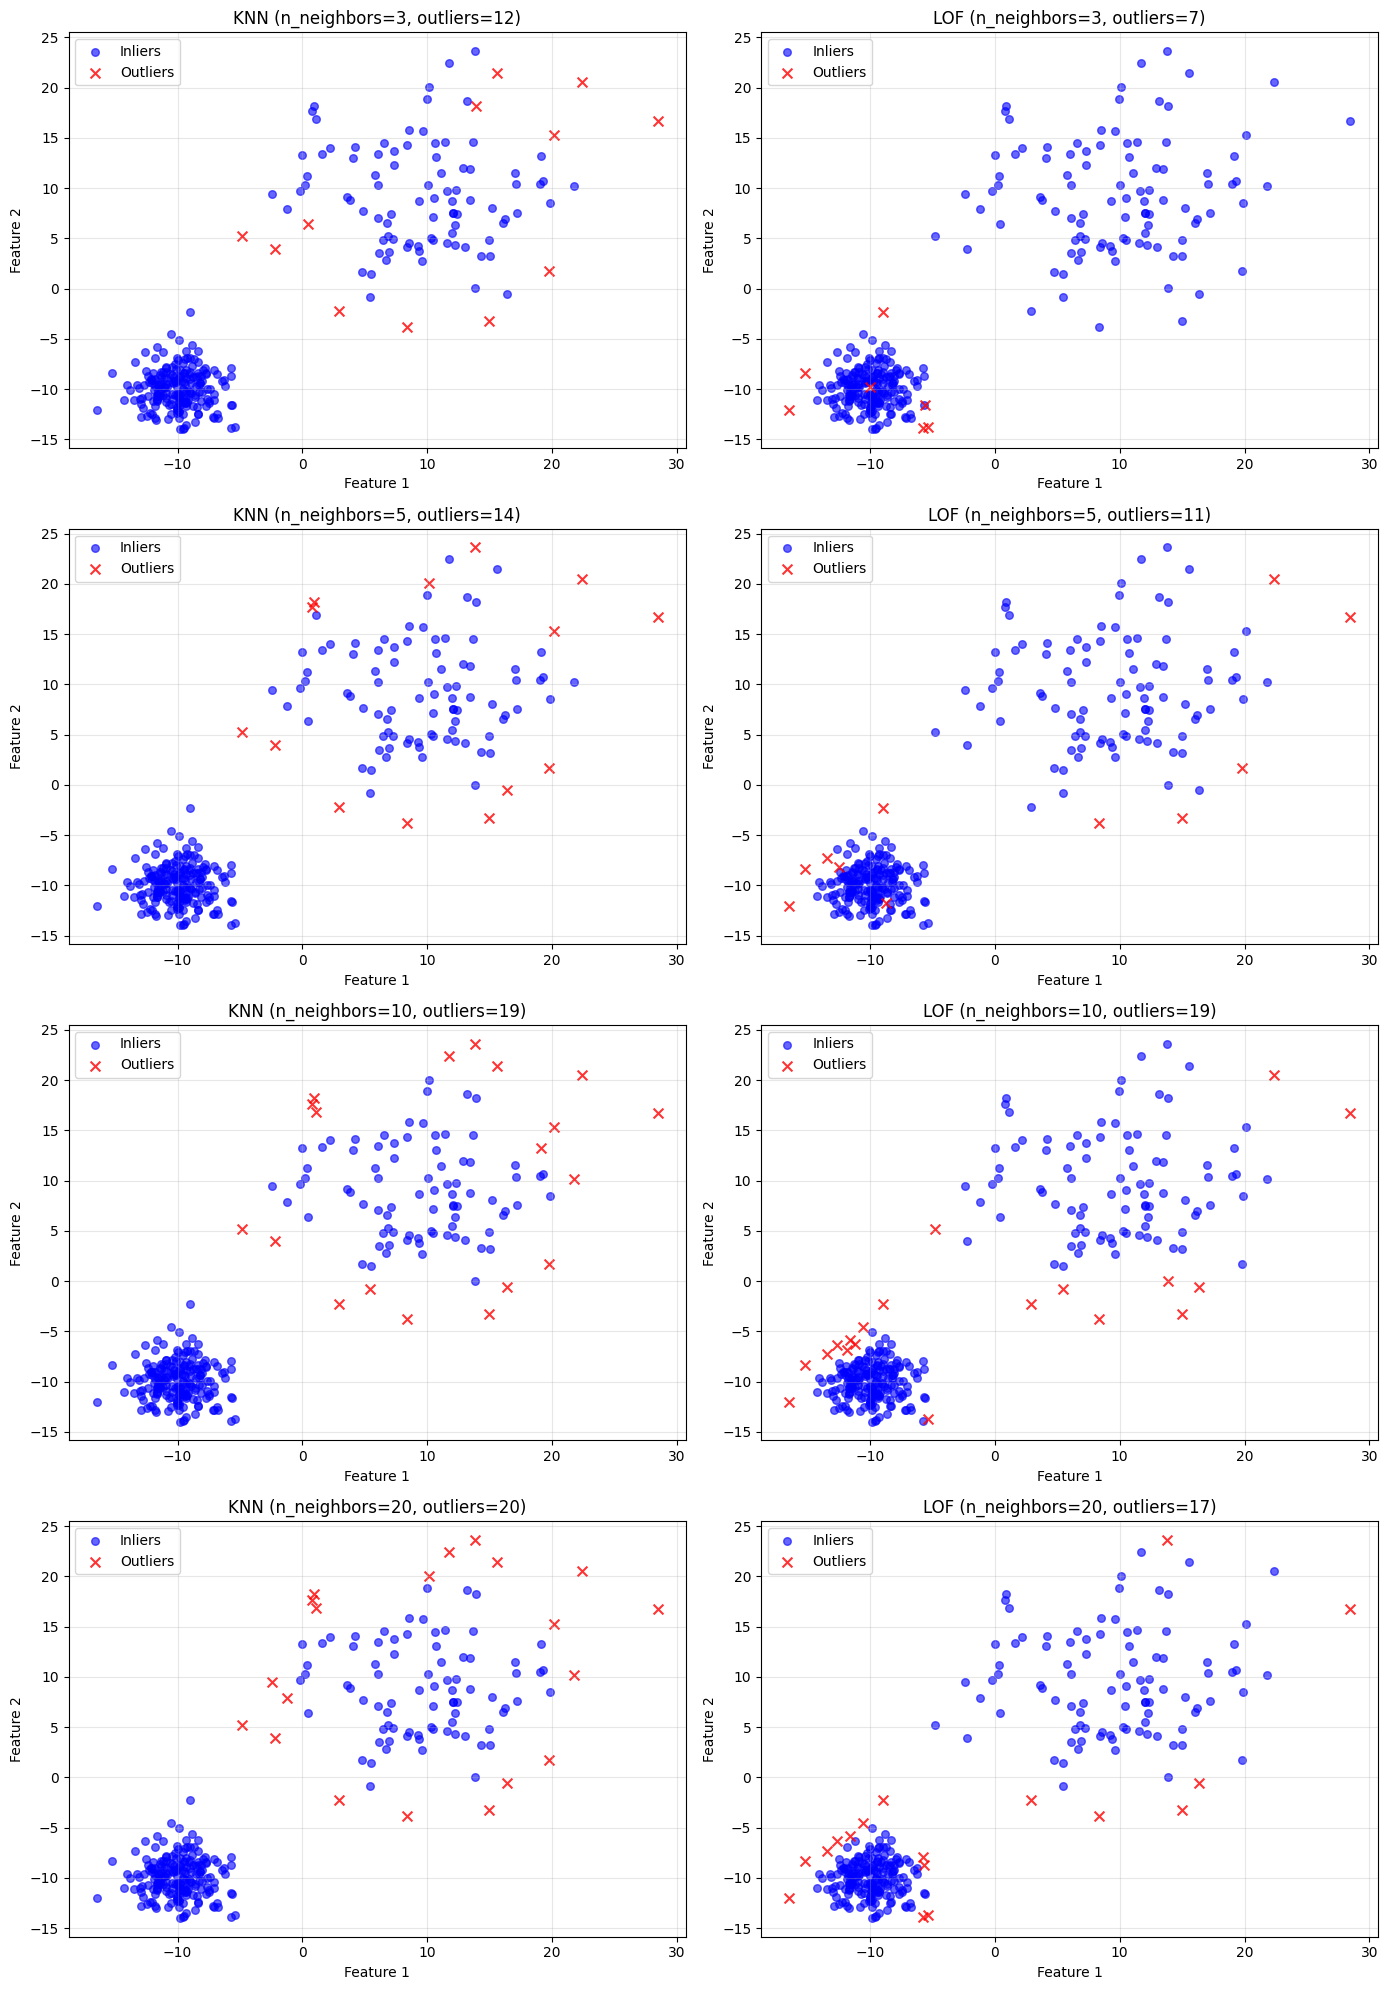

In [ ]:
# Compare KNN and LOF for different n_neighbors values
fig, axes = plt.subplots(
    len(n_neighbors_list), 2, figsize=(14, 5 * len(n_neighbors_list))
)

for i, n_neighbors in enumerate(n_neighbors_list):
    # KNN Model
    knn = KNN(n_neighbors=n_neighbors, contamination=contamination)
    knn.fit(X)
    y_pred_knn = knn.predict(X)
    n_outliers_knn = np.sum(y_pred_knn == 1)

    # LOF Model
    lof = LOF(n_neighbors=n_neighbors, contamination=contamination)
    lof.fit(X)
    y_pred_lof = lof.predict(X)
    n_outliers_lof = np.sum(y_pred_lof == 1)

    # Plot KNN results
    axes[i, 0].scatter(
        X[y_pred_knn == 0, 0],
        X[y_pred_knn == 0, 1],
        c="blue",
        s=30,
        alpha=0.6,
        label="Inliers",
    )
    axes[i, 0].scatter(
        X[y_pred_knn == 1, 0],
        X[y_pred_knn == 1, 1],
        c="red",
        s=50,
        alpha=0.8,
        marker="x",
        label="Outliers",
    )
    axes[i, 0].set_title(f"KNN (n_neighbors={n_neighbors}, outliers={n_outliers_knn})")
    axes[i, 0].set_xlabel("Feature 1")
    axes[i, 0].set_ylabel("Feature 2")
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)

    # Plot LOF results
    axes[i, 1].scatter(
        X[y_pred_lof == 0, 0],
        X[y_pred_lof == 0, 1],
        c="blue",
        s=30,
        alpha=0.6,
        label="Inliers",
    )
    axes[i, 1].scatter(
        X[y_pred_lof == 1, 0],
        X[y_pred_lof == 1, 1],
        c="red",
        s=50,
        alpha=0.8,
        marker="x",
        label="Outliers",
    )
    axes[i, 1].set_title(f"LOF (n_neighbors={n_neighbors}, outliers={n_outliers_lof})")
    axes[i, 1].set_xlabel("Feature 1")
    axes[i, 1].set_ylabel("Feature 2")
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()